In [38]:
% matplotlib inline

In [39]:
# Librería de graficación
import matplotlib.pyplot as plt

# Librería de cálculos matemáticos
import numpy as np

# Librería Estadística
import scipy as sp

### Definición de vectores y graficación

[ 3.  2.  5.  1.  3.]


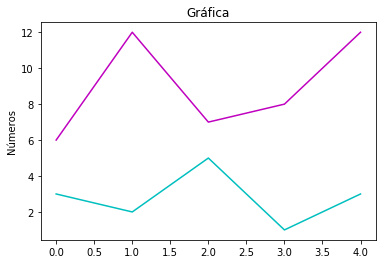

In [51]:
papaya = np.array([3.,2.,5.,1.,3.]).astype(float)
print papaya

vector = np.array([6,12,7,8,12]).astype(float)

plt.plot(papaya, color='c')
plt.plot(vector, color='m')
plt.title(u'Gráfica')
plt.ylabel(u'Números')


In [52]:
a = 10.
b = 34.

c = a + b

print c

44.0


## Foro stack overflow

## Parámetros 

Definición de los parámetros que no varían a lo largo de las iteraciones

In [55]:
P  = 1. # Proporcion de la tierra disponible para colonizar
Ab = 0.25 # Albedo de las margaritas negras 
Aw = 0.75 # Albedo de las margaritas Blancas
Ag = 0.5 # Albedo del suelo desnudo 
s  = 5.67*(10**-8) #cte Stefan-Boltzman
S  = 1000 #Energia Neta que entra la tierra
dl = 0.005 # incremento de L 
q  = 20 
n  = 100 # Numero de iteraciones 
R  = 0.2 # Tasa de mortalidad de las margaritas 

## Variables

Definición de las variables que cambiarán en cada iteración de acuerdo con las ecuaciones planeadas y las condiciones iniciales

In [59]:
# Definicion de variables 
n = 10000 # Número de iteraciones

X   = np.empty((n,1),dtype= float)
A   = np.empty((n,1),dtype= float)
Te  = np.empty((n,1),dtype= float)
Tb  = np.empty((n,1),dtype= float)
Tw  = np.empty((n,1),dtype= float)
Bw  = np.empty((n,1),dtype= float)
Bb  = np.empty((n,1),dtype= float)
L   = np.empty((n,1),dtype= float)
aw  = np.empty((n+1,1),dtype= float)
ab  = np.empty((n+1,1),dtype= float)
daw = np.empty((n,1),dtype= float)
dab = np.empty((n,1),dtype= float)
T   = np.empty((n,1),dtype= float)


In [60]:
# Iteraciones 

aw[0] = 0.5
ab[0] = 0.5


for i in range(n):
    if i == 0: 
        L[i] = 0.7
    else:
        L[i] = L[i-1] + dl 
        
    X[i]   = (P-(ab [i]+ aw[i]))
    A[i]   = (X[i]*Ag) + (ab[i]*Ab) + (aw[i]*Aw)
    Te[i]  = ((S*L[i]*(1-A[i])/s)**0.25)
    Tb[i]  = (q*(A[i]-Ab)+Te[i]) - 273 
    Tw[i]  = (q*(A[i]-Aw)+Te[i]) - 273
    Bb[i]  = (1-(0.003265*(22.5-Tb[i])**2))
    Bw[i]  = (1-(0.003265*(22.5-Tw[i])**2))
    daw[i] = aw[i]*((X[i]*Bw[i])-R) 
    dab[i] = ab[i]*((X[i]*Bb[i])-R)  
    aw[i+1] = aw[i] + daw[i]     
    ab[i+1] = ab[i] + dab[i]    
    T[i]    = i


/Users/Laura/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:15: RuntimeWarning: invalid value encountered in power


In [61]:
Neto = aw[0:n] + ab[0:n] + X[0:n]
Te   = Te - 273

## Graficador

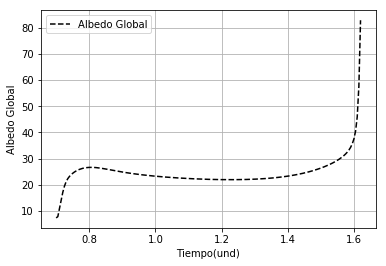

In [62]:
plt.plot(L,Te[0:n],"k--",label="Albedo Global")
plt.ylabel("Albedo Global",fontsize=10)
plt.xlabel("Tiempo(und)",fontsize=10)
plt.grid(True)
plt.legend(fontsize=10)


#plt.twinx()
#plt.plot(T,Te[0:n],"g",label="Temperatura global")
#plt.ylabel("Temperatura (C)",fontsize=10)
#plt.legend(fontsize=10,loc=4)




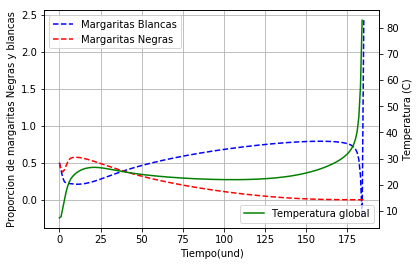

In [63]:
plt.figure()

plt.plot(T,aw[0:n],"b--",label="Margaritas Blancas")
plt.grid(True)
plt.ylabel("Proporcion de margaritas Negras y blancas",fontsize=10)
plt.xlabel("Tiempo(und)",fontsize=10)
plt.plot(T,ab[0:n],"r--",label="Margaritas Negras")
plt.legend(fontsize=10)
plt.twinx()
plt.plot(T,Te[0:n],"g",label="Temperatura global")
plt.ylabel("Temperatura (C)",fontsize=10)
plt.legend(fontsize=10,loc=4)
plt.show()